## COVID DATA

You have observed:

- The overall fatality rate is higher for Portugal (4.3%) than Colombia (3.2%)
- Within each group group, the fatality rate is higher for Colombia than for Portugal

This is an example of Simpson's paradox. Why is that happening for this data? Make a guess before proceeding.

In [1]:
import pandas as pd

In [2]:
df_PT = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/portugal_2020-05-28.csv")
df_PT

,age,sex,fatality
0,60-69,Female,0
1,60-69,Male,0
2,80+,Male,0
3,60-69,Female,0
4,50-59,Female,0
...,...,...,...
31591,40-49,Male,0
31592,30-39,Male,0
31593,80+,Female,0
31594,40-49,Female,0


In [3]:
df_CO = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/colombia_2020-05-28.csv")

df_CO["fatality"] = df_CO["Estado"].map({
    "Fallecido": 1
}).fillna(0)

df_CO["age"] = pd.cut(
    df_CO["Edad"],
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 120],
    labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80+"],
    right=False)

# Look for new columns called "fatality" and "age" in the DataFrame.
df_CO

,Departamento,Edad,Sexo,Tipo,Ubicación,Estado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha recuperado,fatality,age
0,Bogotá D.C.,19,F,Importado,Recuperado,Leve,2020-02-27,- -,2020-03-06,2020-03-13,0.0,10-19
1,Valle del Cauca,34,M,Importado,Recuperado,Leve,2020-03-04,- -,2020-03-09,2020-03-19,0.0,30-39
2,Antioquia,50,F,Importado,Recuperado,Leve,2020-02-29,- -,2020-03-09,2020-03-15,0.0,50-59
3,Antioquia,55,M,Relacionado,Recuperado,Leve,2020-03-06,- -,2020-03-11,2020-03-26,0.0,50-59
4,Antioquia,25,M,Relacionado,Recuperado,Leve,2020-03-08,- -,2020-03-11,2020-03-23,0.0,20-29
...,...,...,...,...,...,...,...,...,...,...,...,...
25361,Buenaventura D.E.,48,M,En estudio,Hospital,Moderado,2020-05-12,- -,2020-05-28,NaN,0.0,40-49
25362,Valle del Cauca,55,F,En estudio,Casa,Leve,2020-05-21,/ /,2020-05-28,NaN,0.0,50-59
25363,Buenaventura D.E.,39,F,En estudio,Casa,Leve,2020-05-23,/ /,2020-05-28,NaN,0.0,30-39
25364,Valle del Cauca,13,F,En estudio,Casa,Leve,2020-05-13,/ /,2020-05-28,NaN,0.0,10-19


Make a side-by-side bar chart comparing the age distributions in the two countries. (Be sure to arrange the columns in the appropriate order.)

<Axes: xlabel='age'>

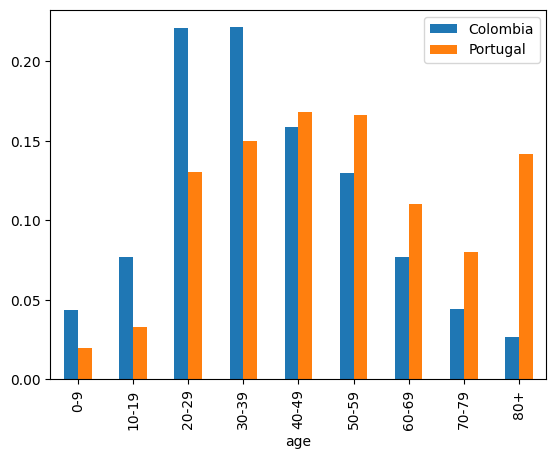

In [42]:
# YOUR CODE HERE
# Make a side-by-side bar chart comparing the age distributions in the two countries. (Be sure to arrange the columns in the appropriate order.)
together = pd.concat([df_CO["age"].value_counts(normalize=True).sort_index(), df_PT["age"].value_counts(normalize=True).sort_index()], axis=1)
together.columns = ["Colombia", "Portugal"]
together.plot.bar()

Make a bar chart displaying the fatality rate of the two countries combined for each age. (*Hint*: use `pd.concat` to combine the two data frames.)

<Axes: xlabel='age'>

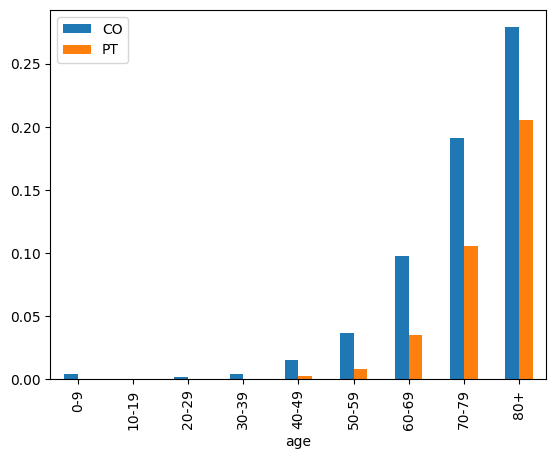

In [41]:
joint_CO = pd.crosstab(df_CO["age"], df_CO["fatality"], normalize=True)
marginal_fatalities_CO = joint_CO.sum(axis=1)
cond_CO = joint_CO[1].divide(marginal_fatalities_CO, axis=0)

joint_PT = pd.crosstab(df_PT["age"], df_PT["fatality"], normalize=True)
marginal_fatalities_PT = joint_PT.sum(axis=1)
cond_PT = joint_PT[1].divide(marginal_fatalities_PT, axis=0)

together = pd.concat([cond_CO, cond_PT], axis=1)
together.columns = ["CO", "PT"]
together.plot.bar()

Write a few clearly worded sentences explaining why Simpson's paradox is happening in this data set.

**YOUR RESPONSE HERE.**

It seems when we look at the data as a whole, Portugal has a higher fatality rate than Colombia. However, when we look at the data by age group, we see that Portugal has a lower fatality rate than Colombia for every age group. This is an example of Simpson's paradox because the trend reverses when we look at the data by age group.